In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

LOAD THE DATA

In [2]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
type(housing)
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [5]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

DATA PREPARATION

In [6]:
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)
dataset


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


EDA

In [7]:
dataset.dtypes
dataset['Latitude']=dataset['Latitude'].astype('object')
dataset['Longitude']=dataset['Longitude'].astype('object')
dataset.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude       object
Longitude      object
dtype: object

In [8]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

DATA STANDARDIZATION

In [9]:
dataset['Price']=housing.target
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


In [11]:
continuous_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
continuous_features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Price']

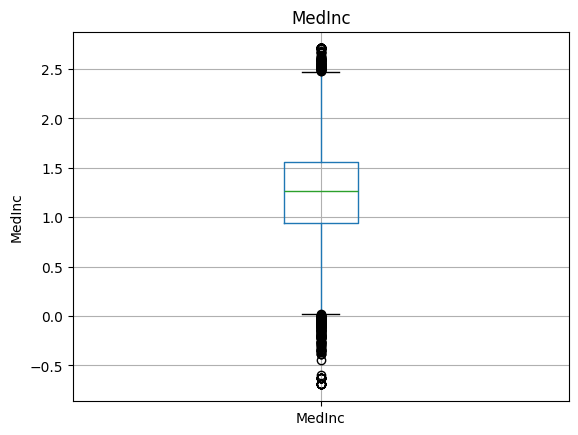

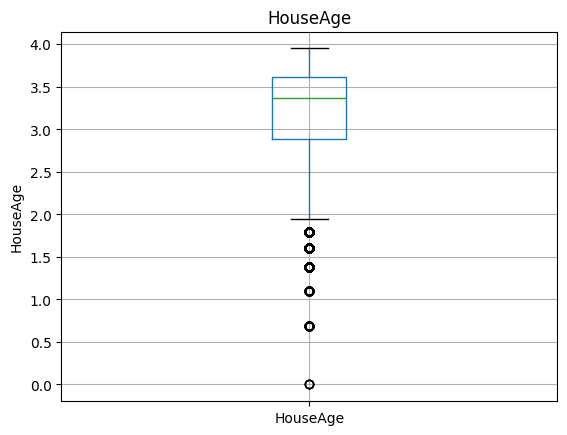

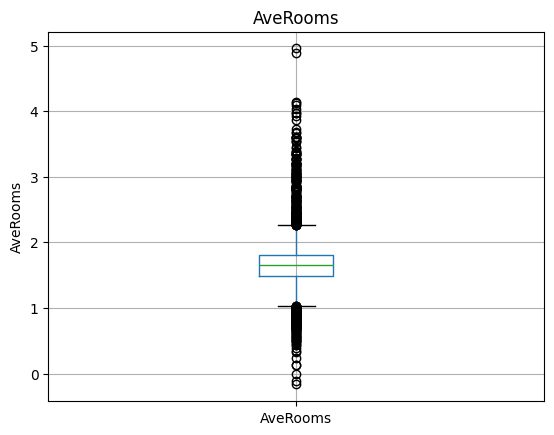

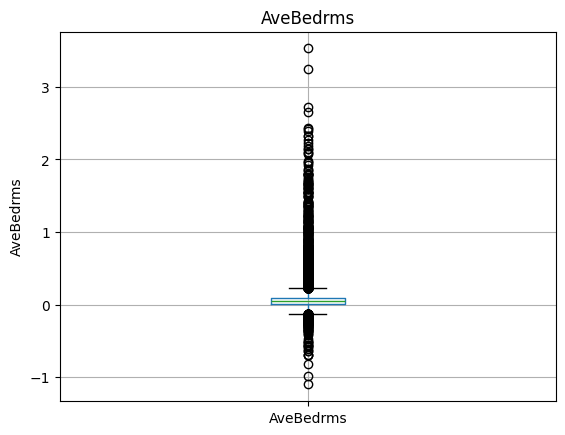

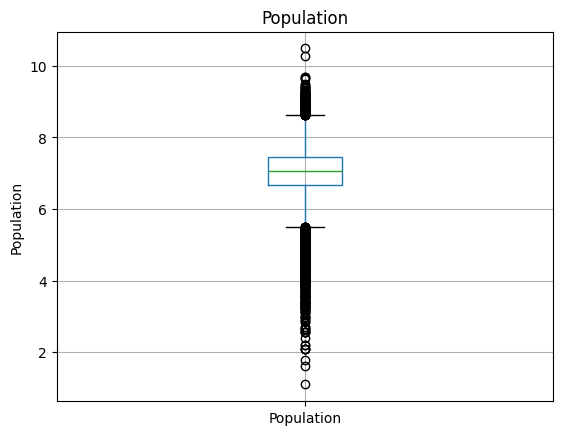

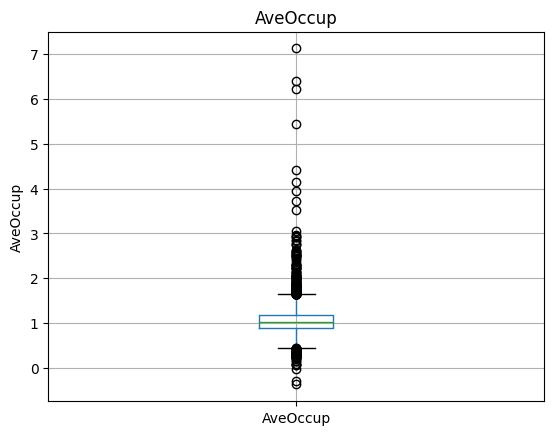

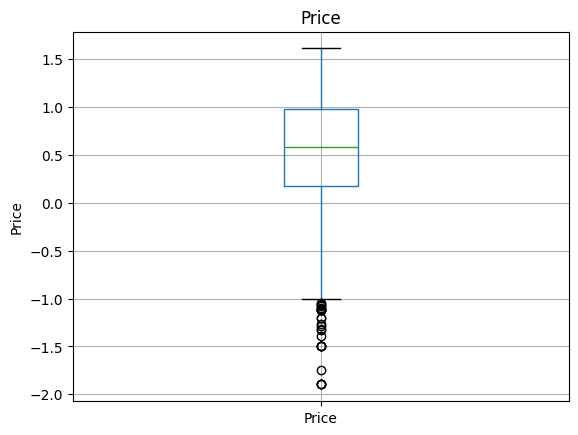

In [12]:
for feature in continuous_features:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [13]:
def count_outliers(data, whis=1.5):
    q1,q3=np.percentile(data,[25,75])
    iqr=q3-q1
    lower_bound=q1-(whis*iqr)
    upper_bound=q3+(whis*iqr)
    count=len(data.loc[(data<lower_bound) | (data>upper_bound)])
    return count

In [14]:
for feature in continuous_features:
  print(feature,count_outliers(dataset[feature]))

MedInc 681
HouseAge 0
AveRooms 511
AveBedrms 1424
Population 1196
AveOccup 711
Price 1071


In [15]:
def remove_outliers(df,feature):
  q1=df[feature].quantile(0.25)
  q3=df[feature].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-(3*iqr)
  upper_bound=q3+(3*iqr)
  outlier_mask=(df[feature]<lower_bound) | (df[feature]>upper_bound)
  return df[~outlier_mask]


In [16]:
for feature in continuous_features:
  dataset=remove_outliers(dataset,feature)
  dataset.reset_index(drop=True,inplace=True)

**NORMALISATION OF CONTINUOUS FEATURES**

In [17]:
for feature in continuous_features:
  dataset[feature]=np.log(dataset[feature])

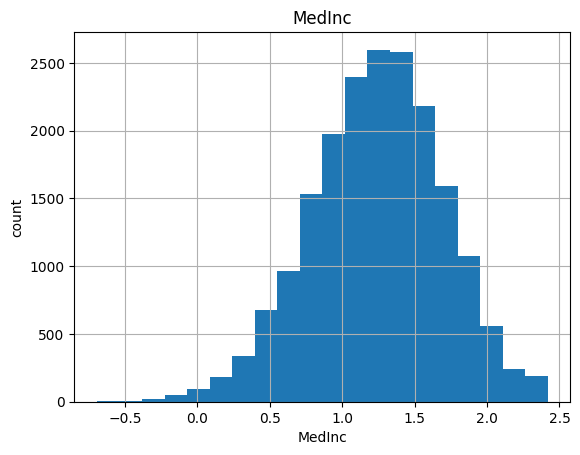

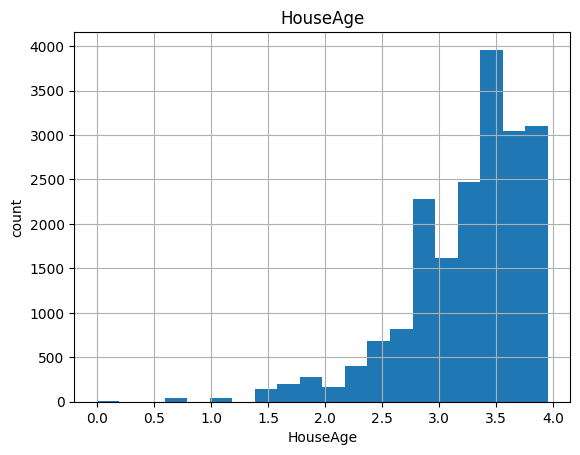

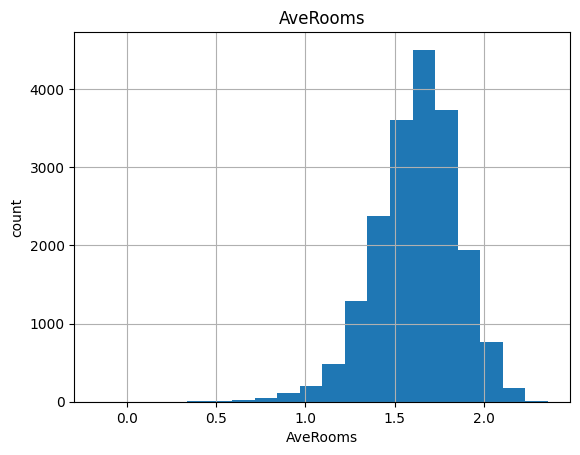

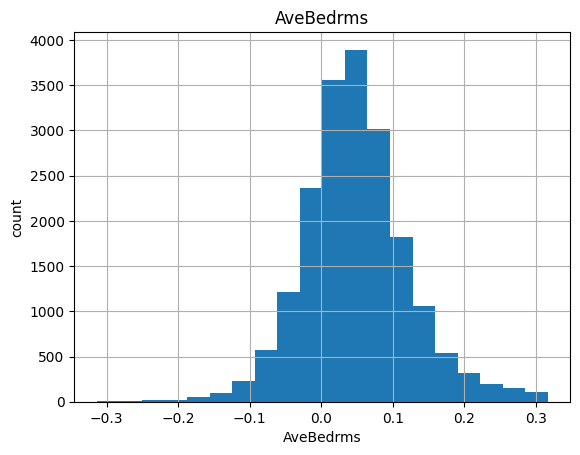

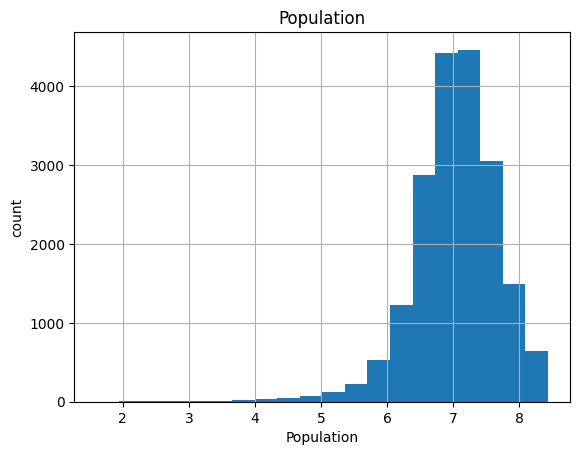

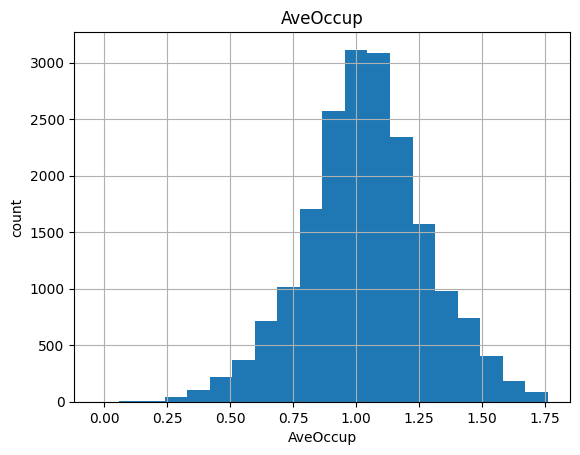

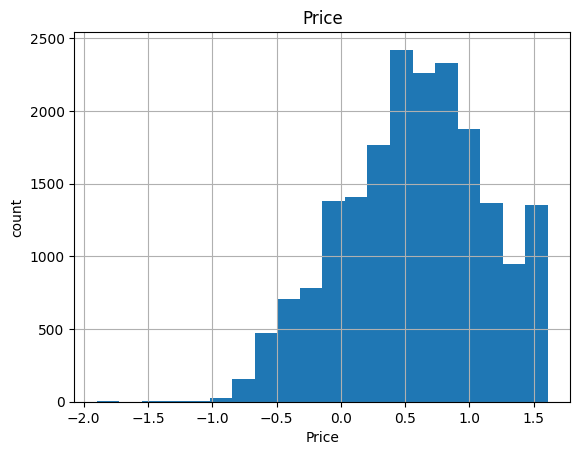

In [18]:
for feature in continuous_features:
  dataset[feature].hist(bins=20)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()

DATA SPLIT

In [19]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(x,y)

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup Latitude  \
0      2.119287  3.713572  1.943640   0.023530    5.774552  0.938270    37.88   
1      2.116424  3.044522  1.830682  -0.028522    7.783641  0.746613    37.86   
2      1.982022  3.951244  2.114825   0.070874    6.206576  1.030426    37.85   
3      1.730434  3.951244  1.760845   0.070514    6.324359  0.935287    37.85   
4      1.347086  3.951244  1.837665   0.077962    6.336826  0.779998    37.85   
...         ...       ...       ...        ...         ...       ...      ...   
19256  0.444878  3.218876  1.618488   0.125163    6.739337  0.940244    39.48   
19257  0.938756  2.890372  1.810587   0.274437    5.874931  1.138732    39.49   
19258  0.530628  2.833213  1.649724   0.113411    6.914731  0.843993    39.43   
19259  0.624440  2.890372  1.673260   0.158643    6.608001  0.752929    39.43   
19260  0.870707  2.772589  1.659126   0.150370    7.234898  0.962021    39.37   

      Longitude  
0       -

TRAIN TEST SPLITTING

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

STANDARDIZATION

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

MODEL TRAINING

NORMAL LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
print(model.coef_)
print(model.intercept_)

[ 0.38502103  0.04106221 -0.07509748  0.04449991  0.01004315 -0.12038807
 -0.56803106 -0.52022299]
0.5781051336640313


REGULARIZATION TECHNIQUES - LASSO REGRESSION

In [25]:
from sklearn.linear_model import Lasso

model_lasso=Lasso()

RIDGE REGRESSION

In [26]:
from sklearn.linear_model import Ridge

model_ridge=Ridge()

ELASTIC NET REGRESSION

In [27]:
from sklearn.linear_model import ElasticNet
model_elastic=ElasticNet()


In [28]:
model_lasso.fit(x_train,y_train)
model_ridge.fit(x_train,y_train)
model_elastic.fit(x_train,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


MODEL PREDICTION

In [29]:
y_cap=model.predict(x_test)
y_cap

array([ 1.39248755,  1.02829615,  1.04089178, ...,  0.4065164 ,
       -0.06645592,  0.74867701], shape=(3853,))

LASSO PREDICTION

In [30]:
y_cap_lasso=model_lasso.predict(x_test)
y_cap_lasso

array([0.57810513, 0.57810513, 0.57810513, ..., 0.57810513, 0.57810513,
       0.57810513], shape=(3853,))

RIDGE PREDICTION

In [31]:
y_cap_ridge=model_ridge.predict(x_test)
y_cap_ridge

array([ 1.39244409,  1.02821475,  1.0408349 , ...,  0.40634919,
       -0.06619869,  0.74870742], shape=(3853,))

MODEL EVALUATION

In [32]:
residuals=y_test-y_cap
residuals

8140     0.216952
13427    0.412013
5067     0.568548
16826    0.163094
6752     0.647921
           ...   
14135    0.144214
5148     0.165028
18790    0.078991
11652    0.105677
5939     0.295127
Name: Price, Length: 3853, dtype: float64

RESIDUAL DISTRIBUTION SHOULD BE NORMALLY DISTRIBUTED

In [33]:
sns.histplot(residuals,bins=30,kde=True)

<Axes: xlabel='Price', ylabel='Count'>

MEAN SQUARED ERROR

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
print(mean_squared_error(y_test,y_cap))


0.0948707149244713


MEAN ABSOLUTE ERROR

In [35]:
print(mean_absolute_error(y_test,y_cap))

0.2325797416271181


r2 score

In [36]:
print(r2_score(y_test,y_cap))

0.7014897606611559


LASSO EVALUATION

In [37]:
print(mean_squared_error(y_test,y_cap_lasso))
print(mean_absolute_error(y_test,y_cap_lasso))
print(r2_score(y_test,y_cap_lasso))

0.31787221832928614
0.45933933710965524
-0.00018337637897092307


RIDGE EVALUATION

In [38]:
print(mean_squared_error(y_test,y_cap_ridge))
print(mean_absolute_error(y_test,y_cap_ridge))
print(r2_score(y_test,y_cap_ridge))

0.09487461542856226
0.23258971600128536
0.7014774877441586


PICKLE LOADING THE LINEAR REGRESSION MODEL

In [39]:
import pickle

pickle.dump(model,open('linear_regression_model.pkl','wb'))